In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [191]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Features information

<b>Age</b>: age in years

<b>sex</b>: sex (1 = male; 0 = female)

<b>cp</b>: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
      
<b>trestbps</b>: resting blood pressure (in mm Hg on admission to the 
        hospital)
        
<b>chol</b>: serum cholestoral in mg/dl

<b>fbs</b>: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

<b>restecg</b>: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
                    
<b>thalach</b>: maximum heart rate achieved
 
<b>exang</b>: exercise induced angina (1 = yes; 0 = no)

<b>oldpeak</b> = ST depression induced by exercise relative to rest

<b>slope</b>: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
        
<b>ca</b>: number of major vessels (0-3) colored by flourosopy

<b>thal</b>: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Output feature
<b>target</b> = 1:True 0:False

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df[['age','trestbps','chol','thalach','oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


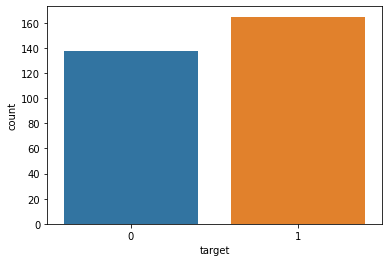

In [42]:
sns.countplot(x='target', data=df)
plt.show()

[]

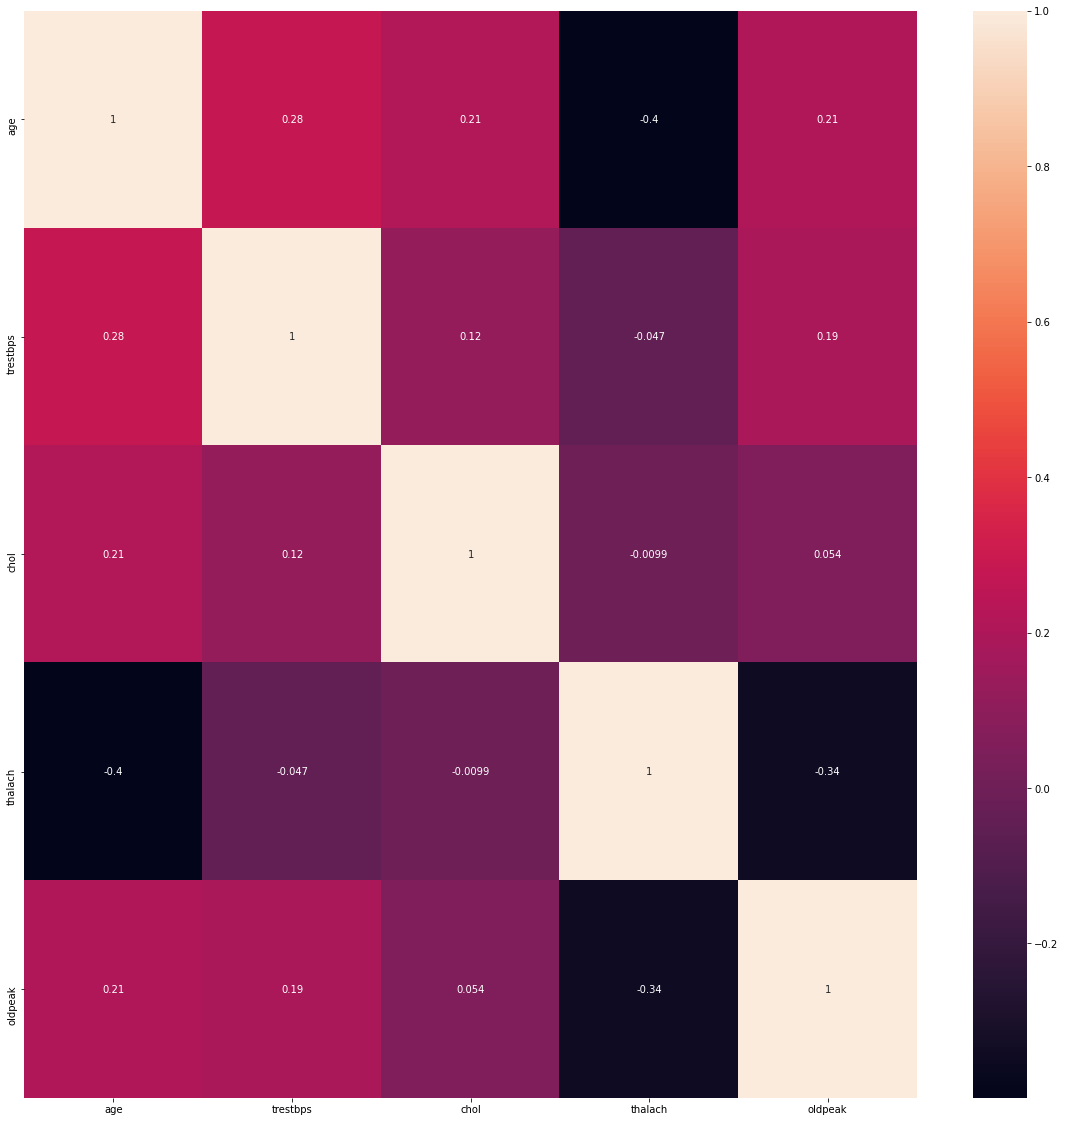

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['age','trestbps','chol','thalach','oldpeak']].corr(),annot=True)
plt.plot()

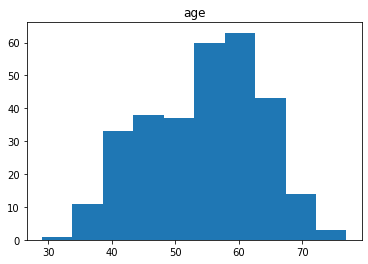

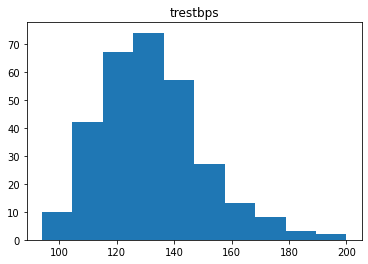

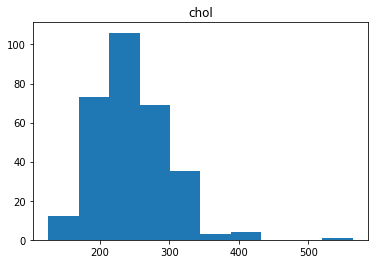

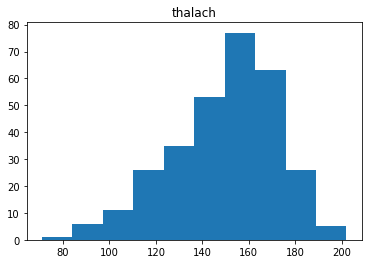

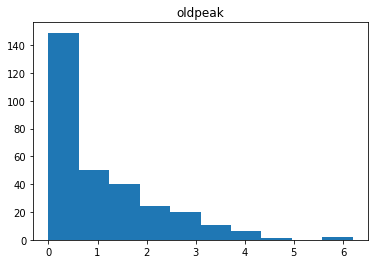

In [15]:
#plt.figure(figsize = (20,20))
for col in ['age','trestbps','chol','thalach','oldpeak']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [149]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix

In [233]:
scaled = StandardScaler()
df[['age','trestbps','chol','thalach','oldpeak']] = scaled.fit_transform((df[['age','trestbps','chol','thalach','oldpeak']]))

In [234]:
df[['age','trestbps','chol','thalach','oldpeak']].head()

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [192]:
dummy_cols = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope','ca','thal']
df = pd.get_dummies(df,columns=dummy_cols)

In [235]:
pd.set_option("display.max_columns", 31) 
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [236]:
y_data = df['target']
x_data = df.drop('target',axis='columns')

In [237]:
x_data.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [219]:
y_data.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [238]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3)

In [221]:
x_train.shape

(212, 30)

In [222]:
x_test.shape

(91, 30)

In [223]:
y_train.shape

(212,)

In [224]:
y_test.shape

(91,)

In [239]:
y_test.value_counts()

1    50
0    41
Name: target, dtype: int64

In [240]:
y_train.value_counts()

1    115
0     97
Name: target, dtype: int64

In [205]:
x_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
22,42,140,226,178,0.0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
187,54,124,266,109,2.2,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
16,58,120,340,172,0.0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
294,44,120,169,144,2.8,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0
81,45,128,308,170,0.0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [241]:
avg_train_scores = []
avg_test_scores = []
for i in range(11,30,2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_test,y_test)
    y_pred = model.predict(x_test)
    print(f'n_neighbors:{i}')
    test = model.score(x_test,y_test)
    avg_test_scores.append(test)
    print('Test Score:',test)
    
    train = model.score(x_train,y_train)
    avg_train_scores.append(train)
    print('Train Score',train)
    
    print()

n_neighbors:11
Test Score: 0.9010989010989011
Train Score 0.7830188679245284

n_neighbors:13
Test Score: 0.9120879120879121
Train Score 0.7735849056603774

n_neighbors:15
Test Score: 0.8901098901098901
Train Score 0.8018867924528302

n_neighbors:17
Test Score: 0.8901098901098901
Train Score 0.7877358490566038

n_neighbors:19
Test Score: 0.8791208791208791
Train Score 0.7877358490566038

n_neighbors:21
Test Score: 0.8791208791208791
Train Score 0.7830188679245284

n_neighbors:23
Test Score: 0.8791208791208791
Train Score 0.7688679245283019

n_neighbors:25
Test Score: 0.8791208791208791
Train Score 0.7594339622641509

n_neighbors:27
Test Score: 0.8901098901098901
Train Score 0.7641509433962265

n_neighbors:29
Test Score: 0.8681318681318682
Train Score 0.7641509433962265



In [242]:
print('Average train score :',np.array(avg_train_scores).mean())
print('Average test score :',np.array(avg_test_scores).mean())

Average train score : 0.7773584905660378
Average test score : 0.8868131868131869


In [243]:
grid_params={
    'n_neighbors':[11,13,15,17,21,23,25,27,29],
    'weights': ['uniform','distance'],
    'metric':['minkowski','euclidean','manhattan']
}

In [244]:
grid_model = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1
)

In [245]:
grid_model.fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 155 out of 162 | elapsed:    6.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    6.1s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [11, 13, 15, 17, 21, 23, 25, 27, 29],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [246]:
grid_model.best_score_

0.8299798792756539

In [247]:
grid_model.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [248]:
grid_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}

In [256]:
model = KNeighborsClassifier(metric='manhattan',n_neighbors=11,weights='uniform')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
model.score(x_test,y_test)

0.8571428571428571

In [257]:
model.score(x_train,y_train)

0.8537735849056604

In [216]:
c_matrix = confusion_matrix(y_test,y_pred)

[]

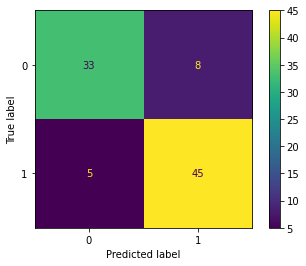

In [258]:
plot_confusion_matrix(model,x_test,y_test)
plt.plot()

[]

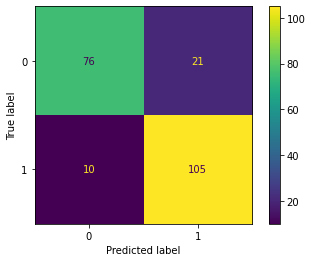

In [259]:
plot_confusion_matrix(model,x_train,y_train)
plt.plot()

In [260]:
model.predict_proba([x_train.loc[1]])

array([[0.09090909, 0.90909091]])